In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dimension = 6
num_samples = 600
MU_0 = 0
MU_1 = 1
SIGMA = 1

In [3]:
def generate_time_series(MU_0, MU_1, SIGMA, dimension, num_samples):
    num_samples = int(num_samples / 2)
    TS = np.concatenate(( np.random.normal(MU_0,SIGMA,(num_samples, dimension)),np.random.normal(MU_1,SIGMA,(num_samples, dimension))))
    return TS

In [4]:
TS = generate_time_series(0, 1, 1, dimension, 600)
TS.shape

(600, 6)

<IPython.core.display.Javascript object>


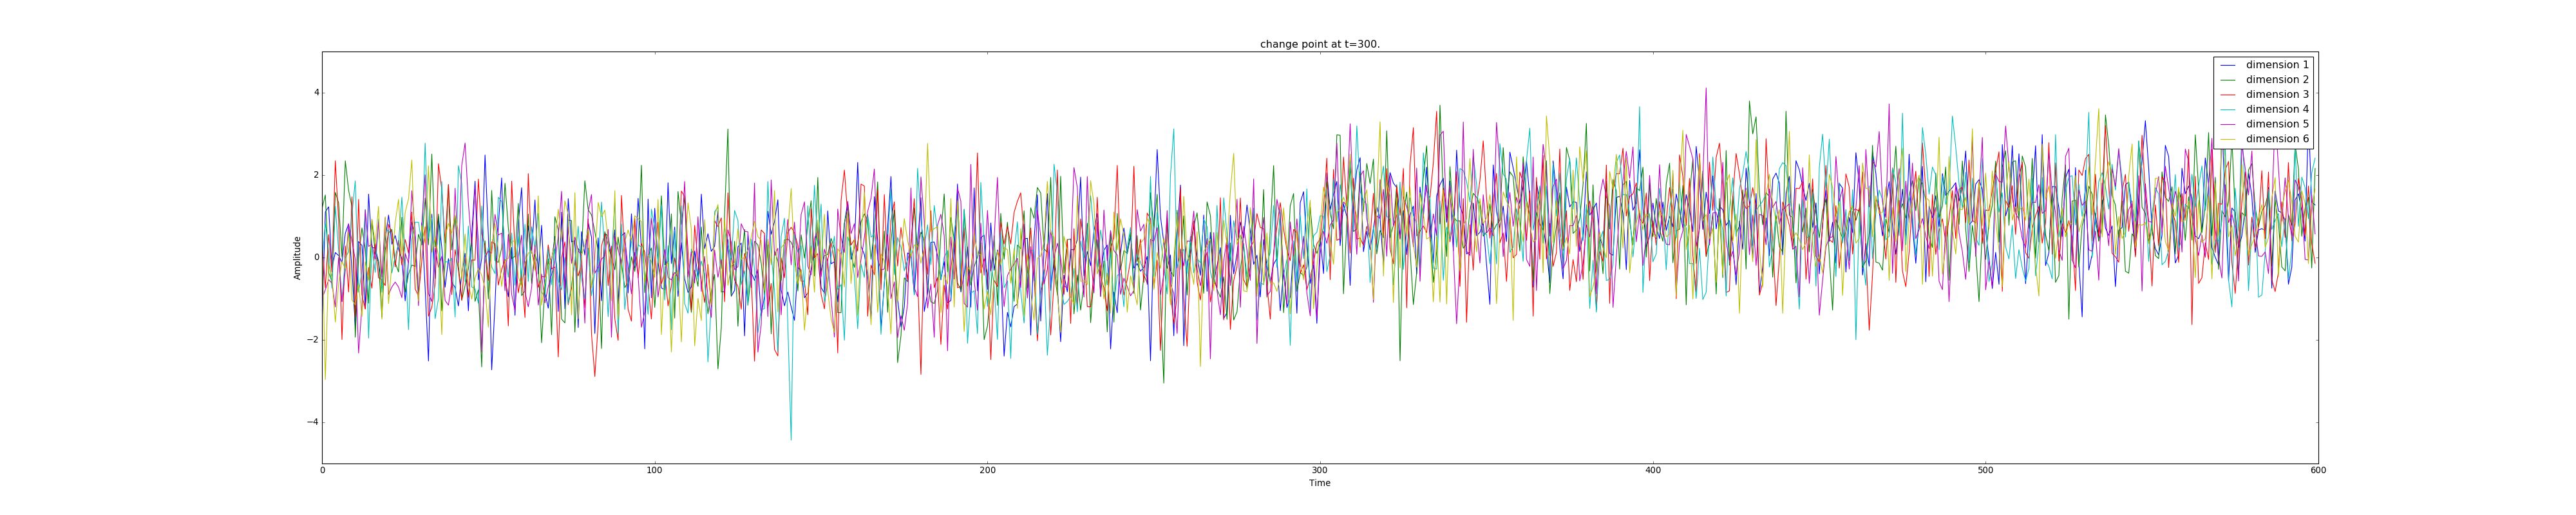

In [5]:
plt.figure(figsize=(50,10))
for k in range(0, dimension):
    plt.plot(TS[:,k], label="dimension {}".format(k+1))
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('change point at t=300.')
plt.legend()
plt.savefig('../images/rd_offline_ts.png')
plt.show()

In [6]:
plt.close()
mu_bar = (1/num_samples)*np.sum(TS)
sigma_cap = (1/num_samples)*np.sum(np.einsum('ij,ij->i', (TS-MU_0), (TS-MU_0)))

In [7]:
l_h0 = (2*math.pi)**((-dimension*num_samples/2) * (np.absolute(sigma_cap)**(-num_samples/2))* math.e**(-dimension*num_samples/2) )
l_h0

1.0

### Observation
* We are unable to find l_h0 and l_h1 directly as the powers often go very high.  Hence we use the alternate method of finding the likelihood ratio

### Alternate way 

In [9]:
x_bar_k = np.zeros((num_samples-2, dimension))
x_bar_n_minus_k = np.zeros((num_samples-2, dimension))
y_k = np.zeros((num_samples-2, dimension))
w_k = np.zeros(num_samples - 2)

for k in range(1, num_samples -1):
    x_bar_k[k-1] = (1/k)* np.sum(TS[:k+1], axis=0)
    x_bar_n_minus_k[k-1] = (1/(num_samples-k))*np.sum(TS[k+1:], axis=0)
    
    y_k[k-1] = np.sqrt((k*(num_samples-k))/num_samples) * np.subtract(x_bar_k[k-1], x_bar_n_minus_k[k-1])
    
    left = np.sum(np.einsum('ij,ij->i', np.subtract(TS[:k+1], x_bar_k[k-1]), np.subtract(TS[:k+1], x_bar_k[k-1])))
    right = np.sum(np.einsum('ij,ij->i', np.subtract(TS[k+1:], x_bar_n_minus_k[k-1]), np.subtract(TS[k+1:], x_bar_n_minus_k[k-1])))
    w_k[k-1] = (1/(num_samples - 2)) * ( left + right)

tk_sq = np.einsum('ij,ij->i', y_k, y_k)* w_k

<IPython.core.display.Javascript object>


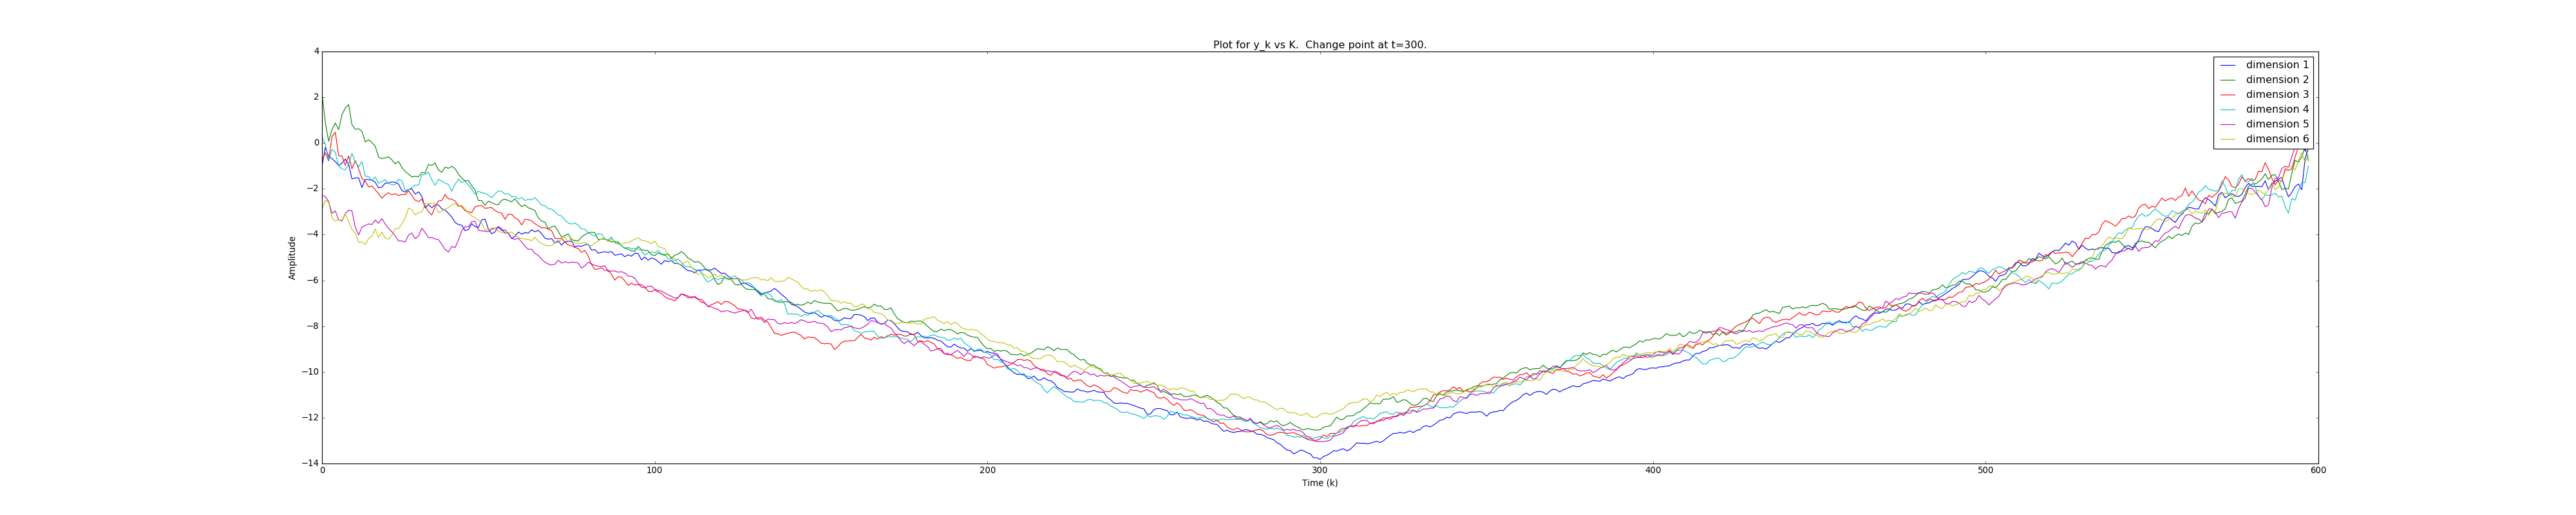

In [10]:
plt.figure(figsize=(50,10))
for k in range(0, dimension):
    plt.plot(y_k[:,k], label="dimension {}".format(k+1))
plt.ylabel('Amplitude')
plt.xlabel('Time (k)')
plt.title('Plot for y_k vs K.  Change point at t=300.')
plt.legend()
plt.savefig('../images/rd_offline_y_k.png')
plt.show()

<IPython.core.display.Javascript object>


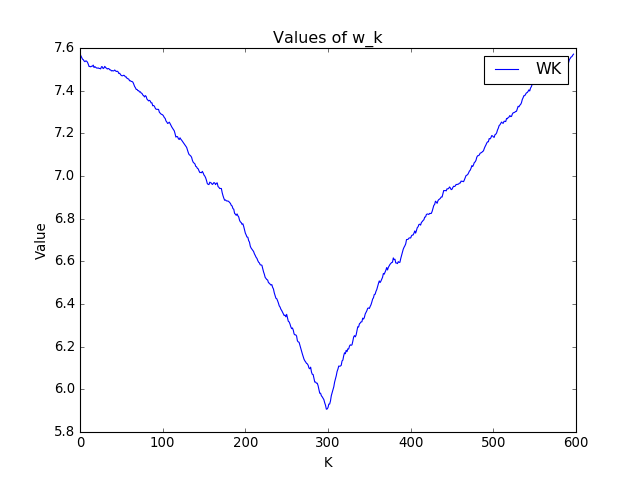

In [11]:
plt.close()
plt.plot(w_k, label="WK")
plt.title('Values of w_k')
plt.xlabel('K')
plt.ylabel('Value')
plt.legend()
plt.savefig('../images/rd_offline_w_k.png')

<IPython.core.display.Javascript object>


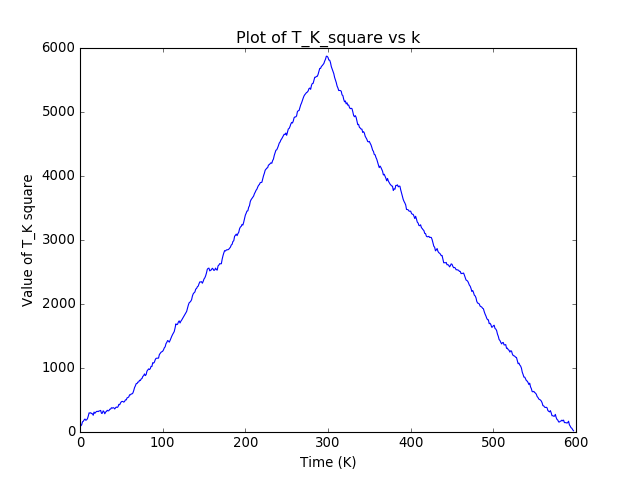

In [12]:
plt.close()
plt.plot(tk_sq, label="Tk square")
plt.title('Plot of T_K_square vs k')
plt.xlabel('Time (K)')
plt.ylabel('Value of T_K square')
plt.savefig('../images/rd_offline_tk_sq.png')

In [13]:
plt.close()
np.argmax(tk_sq)

298